03-3
특성 공학과 규제



In [22]:
# 데이터 준비
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [23]:
# 타깃 데이터 준비
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [33]:
# perch_full과 perch_weight를 훈련세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target= train_test_split(perch_full, perch_weight, random_state = 42)

사이킷런의 변환기
-> 사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공.
-> 이런 클래스는 변환기라고 함.

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
#  2개의 특성 2와 3으로 이루어진 샘플 적용
# 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가.(2와 3을 각기 제곱한 4,9 추가. 2와 3을 곱한 6 추가)
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [27]:
# 다시 특성 변환_절편을 위한 항 제거.
poly = PolynomialFeatures(include_bias= False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [28]:
# train_input을 변환한 데이터를 train_poly에 저장하고 배열의 크기 확인
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [29]:
print(train_poly)

[[  19.6       5.14      3.04    384.16    100.744    59.584    26.4196
    15.6256    9.2416]
 [  22.        5.88      3.52    484.      129.36     77.44     34.5744
    20.6976   12.3904]
 [  18.7       5.2       3.12    349.69     97.24     58.344    27.04
    16.224     9.7344]
 [  17.4       4.59      2.94    302.76     79.866    51.156    21.0681
    13.4946    8.6436]
 [  36.       10.61      6.74   1296.      381.96    242.64    112.5721
    71.5114   45.4276]
 [  25.        6.44      3.68    625.      161.       92.       41.4736
    23.6992   13.5424]
 [  40.       11.93      7.11   1600.      477.2     284.4     142.3249
    84.8223   50.5521]
 [  39.       12.43      7.35   1521.      484.77    286.65    154.5049
    91.3605   54.0225]
 [  43.       11.93      7.28   1849.      512.99    313.04    142.3249
    86.8504   52.9984]
 [  22.        5.64      3.52    484.      124.08     77.44     31.8096
    19.8528   12.3904]
 [  20.        5.08      2.77    400.      101.6    

In [30]:
#  9개의 특성이 어떻게 만들어 졌는지 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [31]:
# 테스트 세트 변환
test_poly = poly.transform(test_input)

다중 회귀 모델 훈련하기

In [34]:
# train_poly를 사용해 모델 훈련.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [35]:
print(lr.score(train_poly, train_target))

0.9903183436982125


In [36]:
#  테스트에 대한 점수 확인
print(lr.score(test_poly, test_target))

0.9714559911594111


In [37]:
# degree 매개변수를 사용하여 필요한 고차항의 최대 차수를 지정가능._5제곱까지 특성만들어 출력하기
poly = PolynomialFeatures(degree=5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [38]:
#  위(특성의 개수가 55개인) 데이터로 선형 회귀모델훈련
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [40]:
# 테스트 세트에 대한 점수
# 훈련세트에 너무 과대적합되어 점수가 큰 음수로...
print(lr.score(test_poly, test_target))

-144.40579436844948


규제
-> 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말함. 즉, 모델이 훈련세트에 과대적합 되지 않도록 만드는 것.
선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일.

In [42]:
# 규제를 적용하기 전 정규화하기
# 객체 ss를 초기화 한후 train_poly를 사용해 객체를 훈련.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

선형회귀 모델에 규제를 추가한 모델을 릿지와 라쏘라고 함.
릿지 - 계수를 제곱한 값을 기준으로 규제 적용
라쏘 - 계수의 절댓값을 기준으로 규제 적용
두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있다.

In [43]:
# 릿지 회귀
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [45]:
# 테스트 세트에 대한 점수 확인
print(ridge.score(test_scaled, test_target))

0.9790693977615387


In [46]:
# alpha 값을 바꿀때마다 score()메서드의 결과를 저장할 리스트 만들기
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

In [47]:
# alpha값을 0.001~100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 후 훈련세트와 테스트 세트의 점수를 리스트에 저장
alpha_list =[0.001,0.014,0.1,1,10,100]
for alpha in alpha_list:
    # 릿지 모델 만들기
    ridge = Ridge(alpha = alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    #  훈련 점수와 테스트 점수 저장.
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

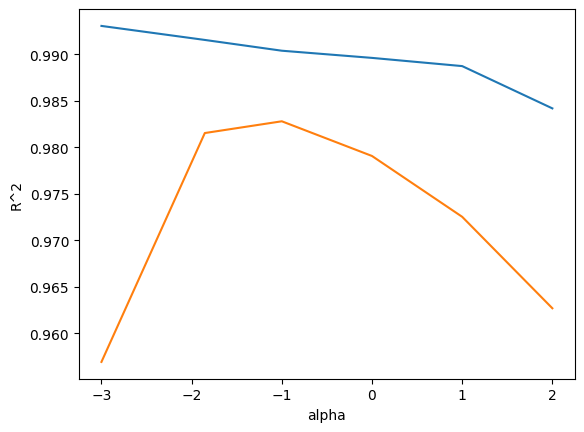

In [48]:
# 그래프 그리기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 적절한 alpha값은 두 그래프가 가깝고 테스트의 점수가 가장 높은 -1, 즉 10^-1 =0.1.

In [49]:
# alpha값을 0.1로 하여 최종 모델 훈련.
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [50]:
#  라쏘 회귀
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [51]:
# 테스트 점수 확인
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [52]:
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    lasso =Lasso(alpha=alpha, max_iter =10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


지정한 반복횟수가 부족할때 ConvergenceWarning 경고 발생.


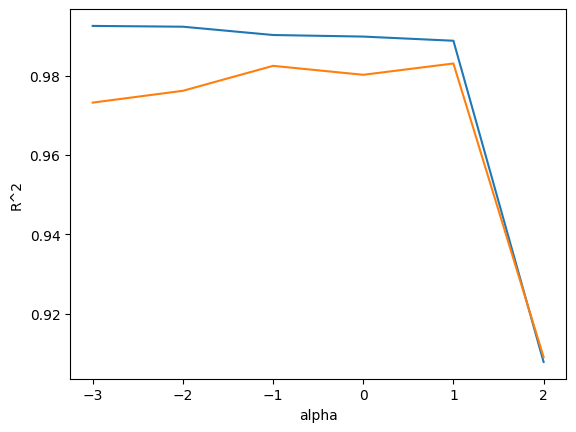

In [55]:
# 그래프 그리기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [56]:
# 라쏘 모델에서 최적의 alpha값은 1, 즉 10^1=10
lasso =Lasso(alpha =10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [57]:
# 55개의 특성 중 라쏘 모델이 사용한 특성은 15개.->이런 특징때문에 라쏘 모델을 유용한 특성을 골라내는 용도로도 사용할수 있음.
print(np.sum(lasso.coef_ ==0))

40
